In [9]:
# %pip install pandas matplotlib seaborn scikit-learn statsmodels
#%pip install statsforecast
#%pip install plotly

import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
dff = pd.read_csv('data/load.csv', parse_dates=['datetime'])

# Ensure the index is a datetime object
dff['datetime'] = pd.to_datetime(dff['datetime'], utc=True)

In [3]:
# Fit to range
df = dff.loc[dff['load_MW'] < 10000].loc[dff['load_MW'] > 2000]

In [4]:
# Rename columns
df = df.rename(columns={'datetime': 'ds', 'load_MW': 'y'})

In [5]:
df['unique_id'] = 'data'
df.head()

,ds,y,unique_id
0,2024-09-11 11:00:00+00:00,6856,data
1,2024-09-11 10:00:00+00:00,7224,data
2,2024-09-11 09:00:00+00:00,7859,data
3,2024-09-11 08:00:00+00:00,7093,data
4,2024-09-11 07:00:00+00:00,7429,data


In [6]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 40)],
    freq = 'H'
)

sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [7]:
forecast_df = sf.predict(h=100, level=[90])
forecast_df.tail()

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:438: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
data,2024-09-15 11:00:00+00:00,6952.717773,2430.265625,11475.169922
data,2024-09-15 12:00:00+00:00,6949.950195,2397.858398,11502.041992
data,2024-09-15 13:00:00+00:00,6956.627930,2375.283203,11537.972656
data,2024-09-15 14:00:00+00:00,6958.280273,2347.966797,11568.593750
data,2024-09-15 15:00:00+00:00,6958.683105,2319.660645,11597.706055


/usr/local/lib/python3.11/dist-packages/statsforecast/core.py:1447: FutureWarning:

Passing the ids as the index is deprecated. Please provide them as a column instead.



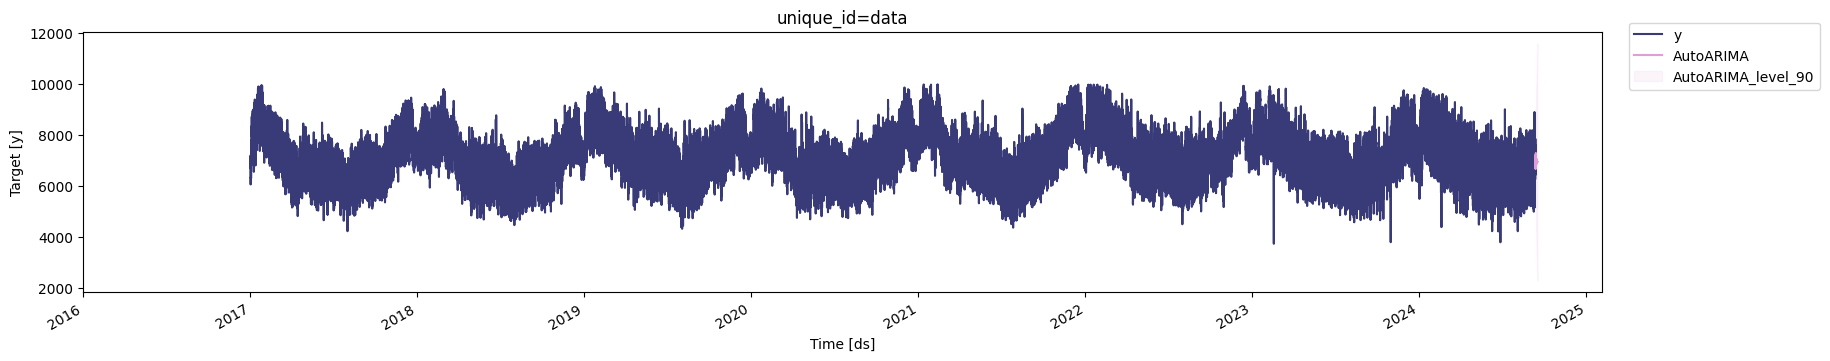

In [13]:
# Plot the forecast
sf.plot(df, forecast_df, level=[90])